In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import seaborn
import powerlaw
from scipy import stats

import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from scipy.stats import norm

In [5]:
path2 = r'E:\netData\APS\3 properties\nodepro2010.zip'
df = pd.read_csv(path2)

In [6]:
df

,id,journal,meta,year,closeness,betweenness,authority,hub,eigenvector,indegree,h,coreness,pagerank,DI,CD,2stepD,D,degree
0,10.1103/PhysRev.1.1,Physical Review,Physical Review1913,1913,0.666667,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1,1,1,1.105597e-06,NaN,1.000000,1.000000,1.000000,1
1,10.1103/PhysRev.1.124,Physical Review,Physical Review1913,1913,0.159071,0.000000e+00,9.791660e-10,0.000000e+00,1.116076e-04,5,2,4,1.797312e-06,NaN,1.000000,1.000000,1.000000,5
2,10.1103/PhysRev.1.141,Physical Review,Physical Review1913,1913,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0,0,4.297752e-07,NaN,0.000000,0.000000,0.000000,0
3,10.1103/PhysRev.1.154,Physical Review,Physical Review1913,1913,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0,0,4.297752e-07,NaN,0.000000,0.000000,0.000000,0
4,10.1103/PhysRev.1.16,Physical Review,Physical Review1913,1913,0.157664,0.000000e+00,9.578776e-10,0.000000e+00,1.744267e-04,4,1,3,2.372948e-06,NaN,1.000000,1.000000,1.000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463343,10.1103/RevModPhys.9.391,Reviews of Modern Physics,Reviews of Modern Physics1937,1937,0.199643,1.419043e+07,1.798345e-06,9.445422e-05,1.994768e-03,10,7,11,9.391861e-06,-0.047244,-0.047244,0.006154,0.015748,19
463344,10.1103/RevModPhys.9.403,Reviews of Modern Physics,Reviews of Modern Physics1937,1937,0.131657,0.000000e+00,0.000000e+00,2.608461e-11,0.000000e+00,0,0,2,4.297752e-07,NaN,0.000000,0.000000,0.000000,2
463345,10.1103/RevModPhys.9.432,Reviews of Modern Physics,Reviews of Modern Physics1937,1937,0.222096,1.784951e+06,2.378447e-04,3.176395e-06,4.156065e-06,50,12,13,9.709074e-06,0.159420,0.159420,0.039454,0.170290,56
463346,10.1103/RevModPhys.9.44,Reviews of Modern Physics,Reviews of Modern Physics1937,1937,0.165863,3.392220e+06,8.589673e-12,1.509779e-07,2.294053e-09,4,2,5,2.722739e-06,-0.030769,-0.030769,0.013699,0.015385,24


# fig B2

In [8]:
ff = df[['D', '2stepD','CD','degree','h','pagerank']]

In [9]:
ff.columns = ['D', '2stepD','CD','degree','h-index','pagerank']

# fig 2

In [13]:
ff = ff.dropna()

In [14]:
col_name=ff.columns.values
spearman_matrix=scipy.stats.spearmanr(ff).correlation

mask=np.zeros_like(spearman_matrix)
for i in range(1,len(mask)):
    for j in range(0,i):
        mask[j][i]=True
spearman_matrix=pd.DataFrame(spearman_matrix,index=col_name,columns=col_name)#矩阵

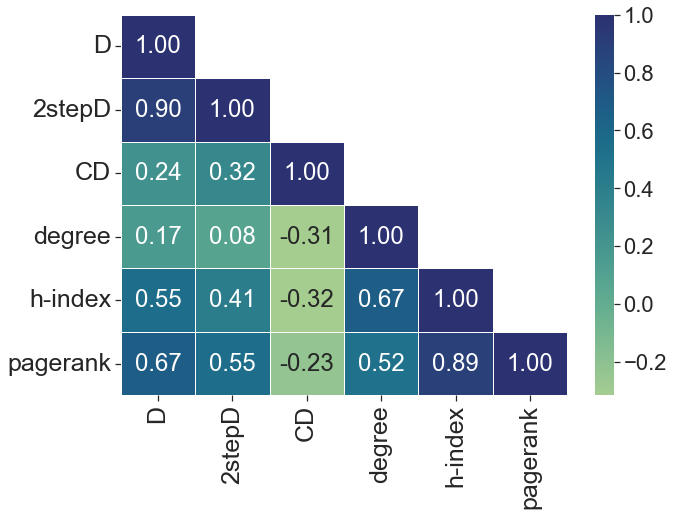

In [15]:
f, ax = plt.subplots(figsize=(10, 7))
sns.set(context='notebook', style='ticks', font_scale=2)
g = seaborn.heatmap(spearman_matrix,annot=True,mask=mask,xticklabels=col_name,yticklabels=col_name, fmt=".2f", linewidth=.5, cmap="crest")#绘制热力图
plt.xticks(size = 25)
plt.yticks(size = 25)
plt.savefig(r"F:\A J YANG PAPER\Disruption index\JOI DI in complex networks\fig\fig2\a4.pdf",bbox_inches = 'tight')

In [16]:
pd.DataFrame(scipy.stats.spearmanr(ff).pvalue)

,0,1,2,3,4,5
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
ff2 = ff[ff['degree']>20][ff['D']<1][ff['D']>0]

C:\Users\nd\AppData\Local\Temp\ipykernel_8272\663520991.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ff2 = ff[ff['degree']>20][ff['D']<1][ff['D']>0]


<Figure size 1440x1440 with 0 Axes>

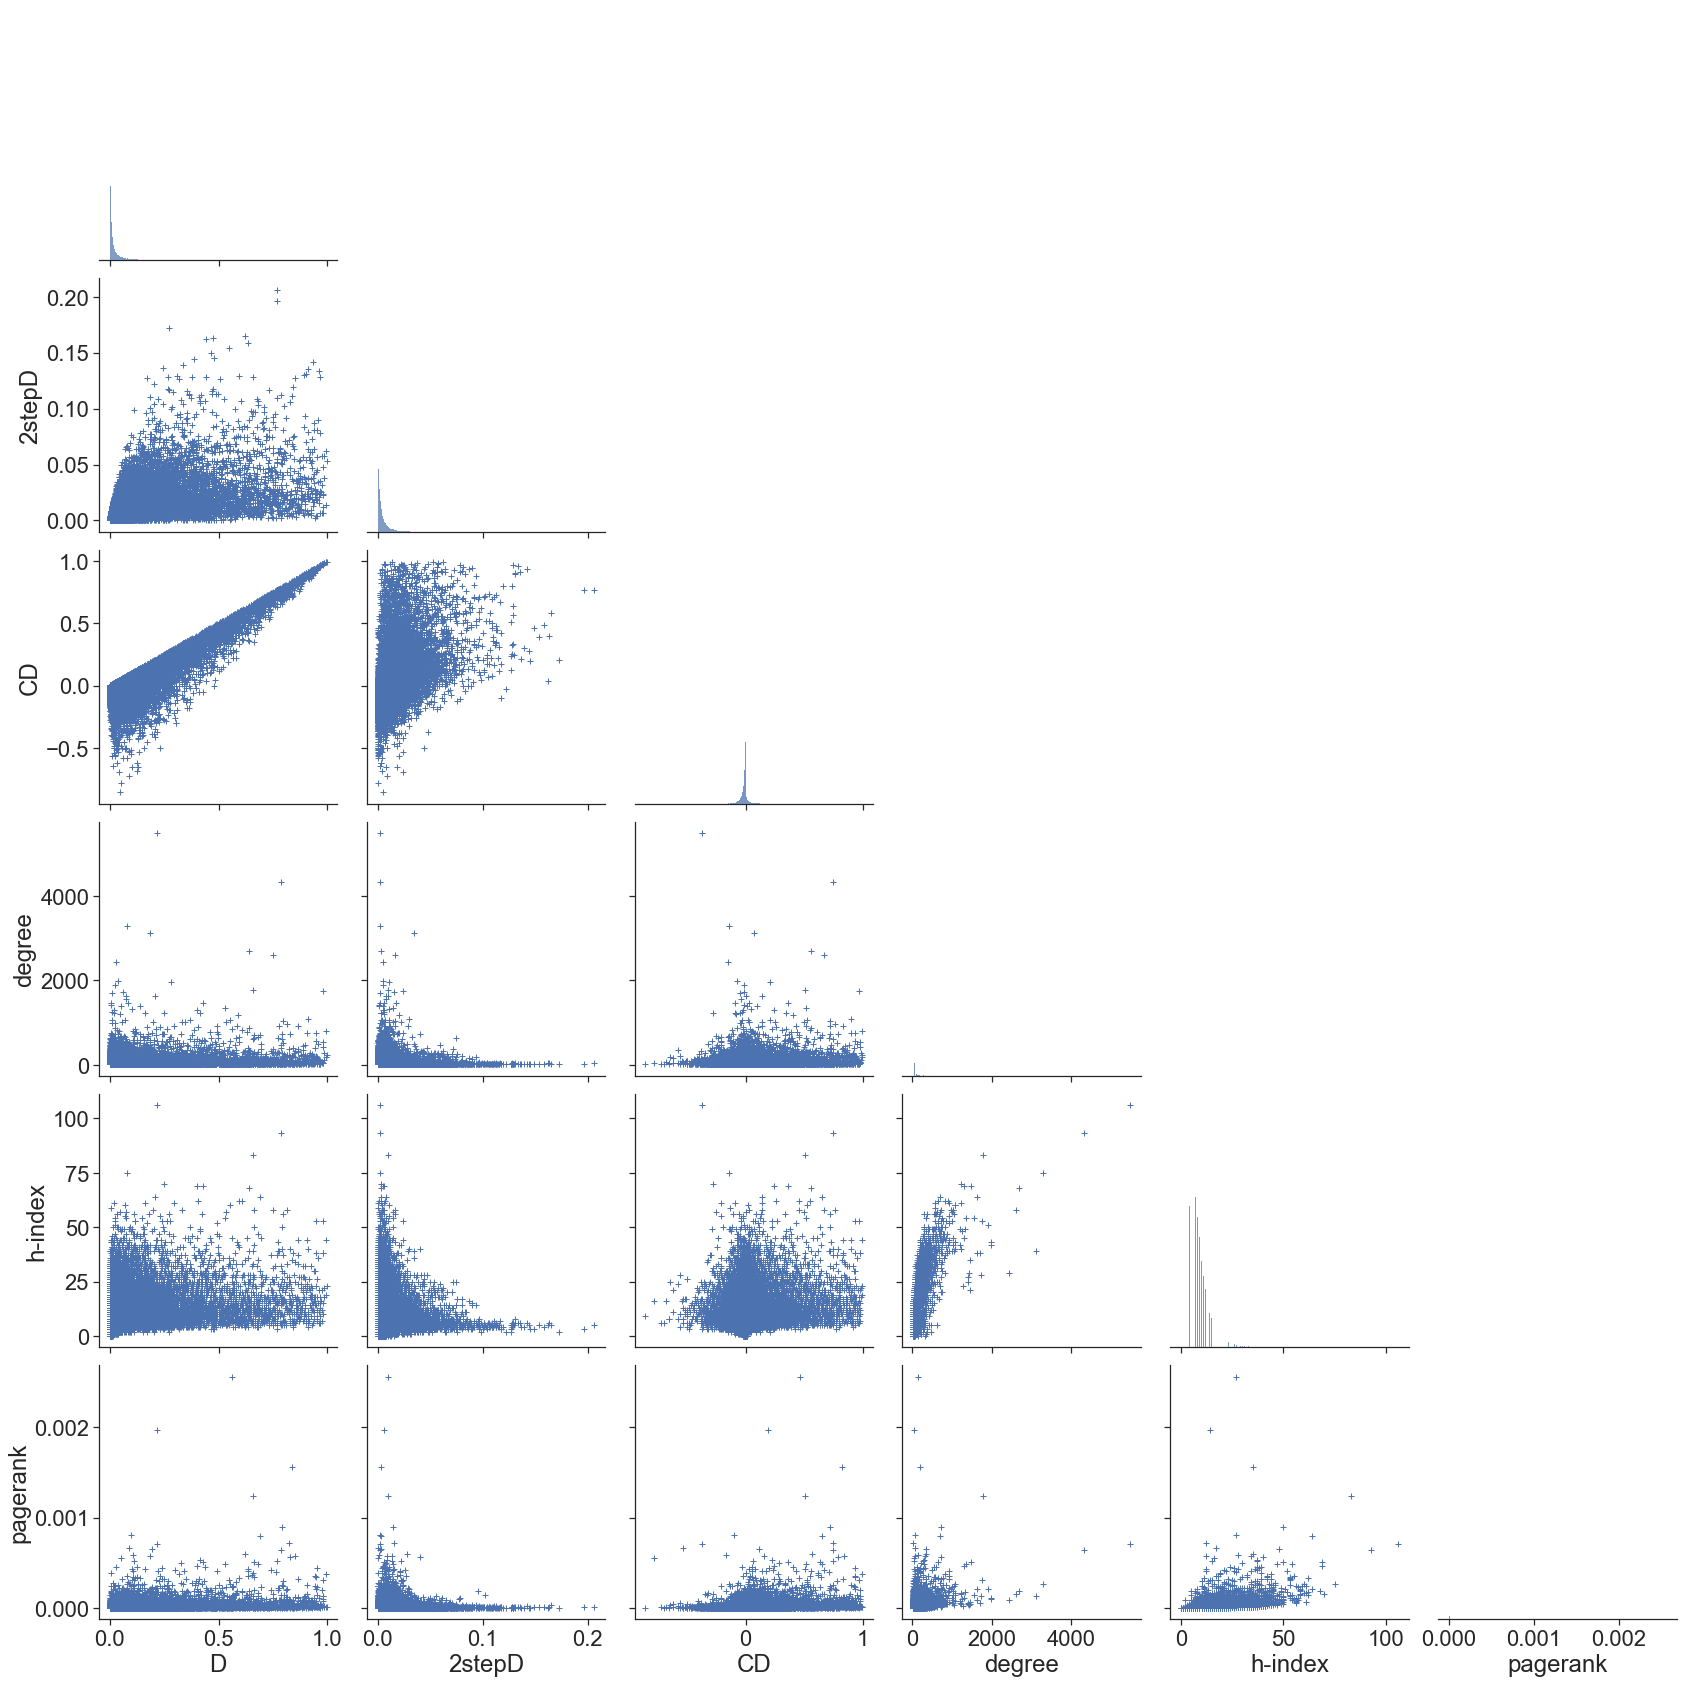

In [39]:
plt.figure(figsize=(20, 20))
sns.set(context='notebook', style='ticks', font_scale=2)
g = sns.pairplot(ff2, height=4, corner="lower", diag_kind="hist", plot_kws=dict(marker="+", linewidth=1))
#g.figure.dpi = 400

In [28]:
ff3 = ff2[['D', '2stepD','CD']]

<Figure size 1008x1008 with 0 Axes>

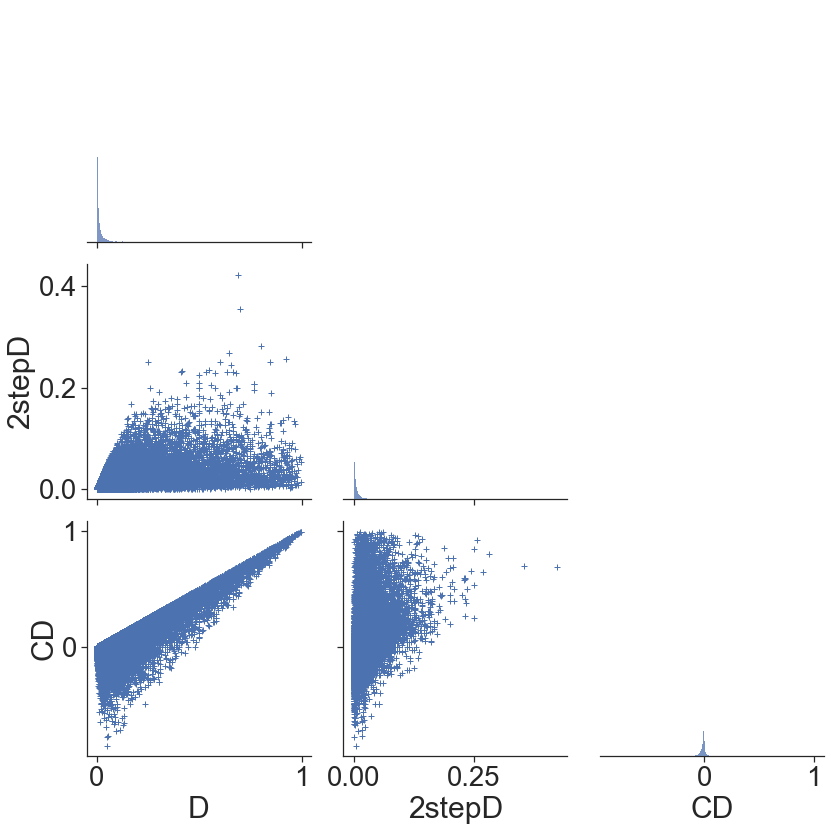

In [38]:
plt.figure(figsize=(14, 14))
sns.set(context='notebook', style='ticks', font_scale=2.5)
g = sns.pairplot(ff3, height=4, corner="lower", diag_kind="hist", plot_kws=dict(marker="+", linewidth=1))